Staffing Train Head:
         date section_id  employees_on_duty  total_task_time_minutes
0  2021-01-01    SEC-001                  1               834.569483
1  2021-01-01    SEC-002                  4              1525.368990
2  2021-01-01    SEC-003                  2               662.095279
3  2021-01-01    SEC-004                  4              1499.112620
4  2021-01-01    SEC-005                  3              1238.533073
Staffing Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     5802 non-null   object 
 1   section_id               5802 non-null   object 
 2   employees_on_duty        5802 non-null   int64  
 3   total_task_time_minutes  5802 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 181.4+ KB
None
Staffing Train Describe:
       employees_on_

<Figure size 1000x600 with 0 Axes>

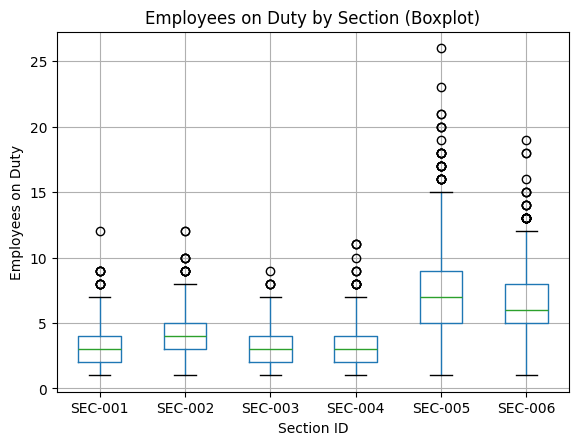

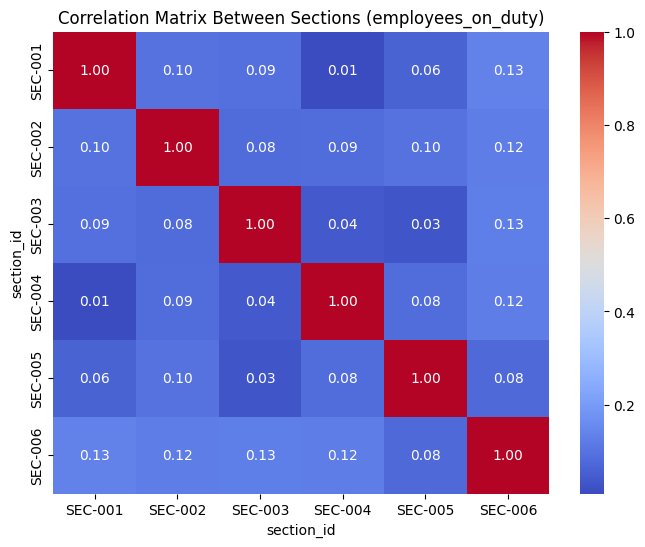

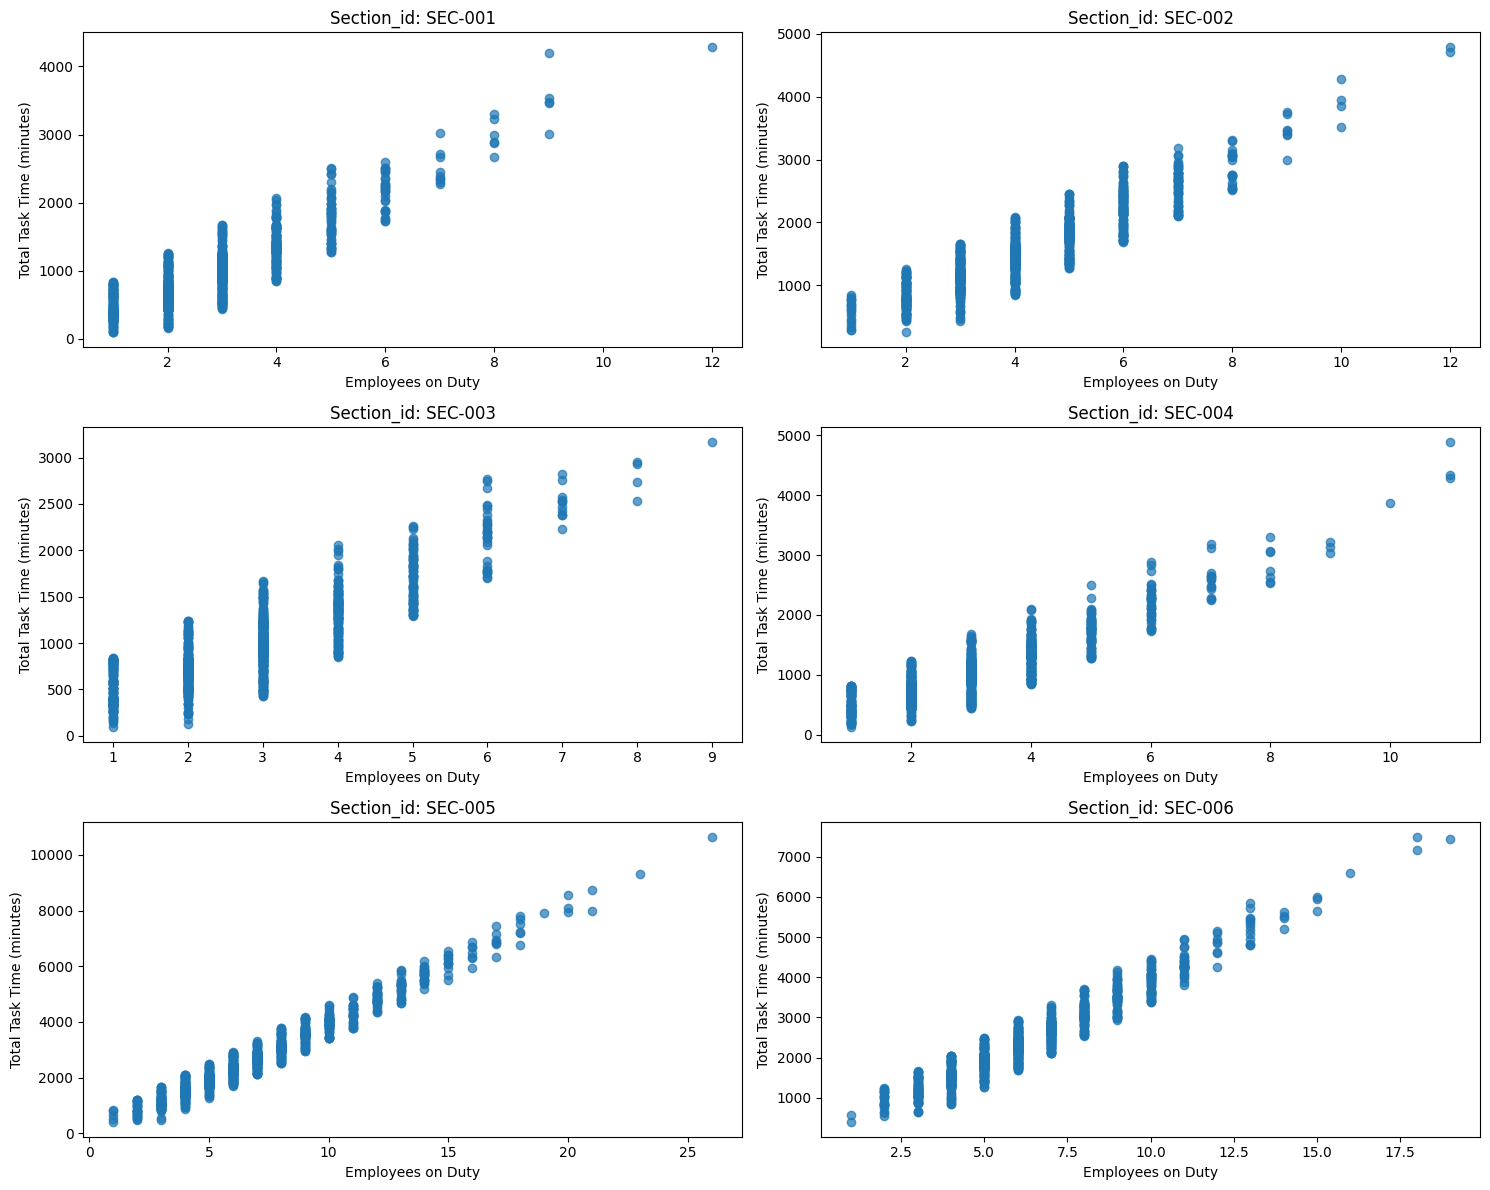

Bookings Train Head:
                                 booking_id  citizen_id booking_date  \
0  f7b59ba3793fea61282cb02be2247cebd0a75306  4229044420   2021-01-01   
1  cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80  5389442635   2021-01-01   
2  0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8  2123783919   2021-01-01   
3  d4bf826153212fa325ad98b215668ab942365607  6359918966   2021-01-01   
4  ebb4c9687acbaf65376d8e379bd1341d1c15127e   178732202   2021-01-01   

  appointment_date appointment_time        check_in_time  \
0       2021-01-01            09:03  2021-01-01 09:11:00   
1       2021-01-01            09:12  2021-01-01 09:24:00   
2       2021-01-01            09:36  2021-01-01 09:29:00   
3       2021-01-01            09:45  2021-01-01 10:07:00   
4       2021-01-01            10:12  2021-01-01 10:26:00   

                  check_out_time   task_id  num_documents  queue_number  \
0  2021-01-01 09:48:15.166353269  TASK-002              0             2   
1  2021-01-01 10:24:12.189261137  T

In [ ]:
# Combined EDA for staffing_train, bookings_train, tasks.csv, task1_test_inputs.csv, and task2_test_inputs.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

# Load datasets
print('Loading datasets...')
df_staff = pd.read_csv('staffing_train.csv')
df_bookings = pd.read_csv('bookings_train.csv')
df_tasks = pd.read_csv('tasks.csv')
df_task1_test = pd.read_csv('Evaluation Inputs/task1_test_inputs.csv')
try:
    df_task2 = pd.read_csv('Evaluation Inputs/task2_test_inputs.csv')
except Exception as e:
    print('Could not load task2_test_inputs.csv:', e)
    df_task2 = None

# --- Staffing Train EDA ---
print('Staffing Train Head:')
print(df_staff.head())
print('Staffing Train Columns:', df_staff.columns.tolist())
print('Staffing Train Info:')
print(df_staff.info())
print('Staffing Train Describe:')
print(df_staff.describe())
print('Staffing Train Nulls:')
print(df_staff.isnull().sum())

# Date checks
df_staff['date'] = pd.to_datetime(df_staff['date'])
full_range = pd.date_range(start=df_staff['date'].min(), end=df_staff['date'].max(), freq='D')
missing_dates = full_range.difference(pd.DatetimeIndex(df_staff['date']))
print('Missing calendar dates in staffing_train:')
print(missing_dates)

# Section checks
section_counts = df_staff.groupby('date')['section_id'].nunique()
dates_missing_sections = section_counts[section_counts < 6]
print('Dates with missing sections (less than 6):')
print(dates_missing_sections)

# Distribution of employees_on_duty
plt.figure(figsize=(8, 5))
sns.histplot(df_staff['employees_on_duty'], bins=30, kde=True)
plt.title('Distribution of Employees on Duty')
plt.xlabel('Employees on Duty')
plt.show()

# Distribution of total_task_time_minutes
plt.figure(figsize=(8, 5))
sns.histplot(df_staff['total_task_time_minutes'], bins=30, kde=True)
plt.title('Distribution of Total Task Time (minutes)')
plt.xlabel('Total Task Time (minutes)')
plt.show()

# Pairplot for numeric columns
sns.pairplot(df_staff.select_dtypes(include='number'))
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
df_staff.boxplot(column='employees_on_duty', by='section_id')
plt.title('Employees on Duty by Section (Boxplot)')
plt.suptitle('')
plt.xlabel('Section ID')
plt.ylabel('Employees on Duty')
plt.show()

# Correlation matrix
pivot_df = df_staff.pivot_table(index='date', columns='section_id', values='employees_on_duty')
corr_matrix = pivot_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Sections (employees_on_duty)')
plt.show()

# Scatter plot employees_on_duty vs total_task_time_minutes
sections = df_staff['section_id'].unique()
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()
for i, section in enumerate(sections):
    section_df = df_staff[df_staff['section_id'] == section]
    axes[i].scatter(section_df['employees_on_duty'], section_df['total_task_time_minutes'], alpha=0.7)
    axes[i].set_title(f'Section_id: {section}')
    axes[i].set_xlabel('Employees on Duty')
    axes[i].set_ylabel('Total Task Time (minutes)')
plt.tight_layout()
plt.show()

# --- Bookings Train EDA ---
print('Bookings Train Head:')
print(df_bookings.head())
print('Bookings Train Columns:', df_bookings.columns.tolist())
print('Bookings Train Info:')
print(df_bookings.info())
print('Bookings Train Describe:')
print(df_bookings.describe())
print('Bookings Train Nulls:')
print(df_bookings.isnull().sum())

# Distribution of numeric columns in bookings_train
for col in df_bookings.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_bookings[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} in bookings_train')
    plt.xlabel(col)
    plt.show()

# --- Tasks EDA ---
print('Tasks Head:')
print(df_tasks.head())
print('Tasks Columns:', df_tasks.columns.tolist())
print('Tasks Info:')
print(df_tasks.info())
print('Tasks Describe:')
print(df_tasks.describe())
print('Tasks Nulls:')
print(df_tasks.isnull().sum())

# Correlation matrix for tasks.csv
if df_tasks.select_dtypes(include='number').shape[1] > 1:
    corr_tasks = df_tasks.select_dtypes(include='number').corr()
    print('Correlation matrix for tasks.csv:')
    print(corr_tasks)
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_tasks, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Correlation Matrix for tasks.csv')
    plt.show()

# --- Task 1 Test Inputs EDA ---
print('Task 1 Test Inputs Head:')
print(df_task1_test.head())
print('Task 1 Test Inputs Columns:', df_task1_test.columns.tolist())
print('Task 1 Test Inputs Info:')
print(df_task1_test.info())
print('Task 1 Test Inputs Describe:')
print(df_task1_test.describe())
print('Task 1 Test Inputs Nulls:')
print(df_task1_test.isnull().sum())

# Correlation matrix for task1_test_inputs.csv
if df_task1_test.select_dtypes(include='number').shape[1] > 1:
    corr_task1 = df_task1_test.select_dtypes(include='number').corr()
    print('Correlation matrix for task1_test_inputs.csv:')
    print(corr_task1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_task1, annot=True, cmap='magma', fmt='.2f')
    plt.title('Correlation Matrix for task1_test_inputs.csv')
    plt.show()

# --- Task 2 Test Inputs EDA (if available) ---
if df_task2 is not None:
    print('Task 2 Test Inputs Head:')
    print(df_task2.head())
    print('Task 2 Test Inputs Columns:', df_task2.columns.tolist())
    print('Task 2 Test Inputs Info:')
    print(df_task2.info())
    print('Task 2 Test Inputs Describe:')
    print(df_task2.describe())
    print('Task 2 Test Inputs Nulls:')
    print(df_task2.isnull().sum())
    if df_task2.select_dtypes(include='number').shape[1] > 1:
        corr_task2 = df_task2.select_dtypes(include='number').corr()
        print('Correlation matrix for task2_test_inputs.csv:')
        print(corr_task2)
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_task2, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix for task2_test_inputs.csv')
        plt.show()
else:
    print('Task 2 Test Inputs not available.')
